In [148]:
%matplotlib inline

In [149]:
import warnings
warnings.filterwarnings('ignore')

In [150]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import sklearn.datasets as dta
import scipy.stats as stats
import plotly.express as px

In [151]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/merge_file.csv')
# Read the csv file
combined_df = pd.read_csv(file_path)
# Display data
combined_df.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [152]:
#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
combined_df_clean = combined_df.copy()  
combined_df_clean.loc[:, combined_df_clean.columns != object_column] = combined_df_clean.loc[:, 
                       combined_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')

#combined_df_clean = combined_df_clean.apply(pd.to_numeric, errors='coerce').astype('Int64')
combined_df_clean.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,2013_rental,2014_rental,2015_rental,2016_rental,2017_rental,2018_rental,2019_rental,2020_rental,2021_rental,2022_rental
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,1909.0,1957.0,1940.0,1903.0,1900.0,1967.0,2016.0,1990.0,2340.0,2420.0
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,1022.0,1103.0,958.0,1016.0,1007.0,1042.0,1068.0,1054.0,1240.0,1282.0
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,953.0,1075.0,1045.0,1081.0,1083.0,1121.0,1149.0,1134.0,1334.0,1379.0
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,1210.0,1222.0,1227.0,1260.0,1263.0,1307.0,1340.0,1323.0,1556.0,1609.0
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,2132.0,2237.0,2345.0,2465.0,2469.0,2555.0,2619.0,2585.0,3040.0,3143.0


In [153]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/population_2012_2022.csv')
# Read the csv file
population_df = pd.read_csv(file_path)
#print df 
population_df.head()

,State,Population 2012,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,Population 2022
0,AK,730810,737626,737075,738430,742575,740983,736624,733603,733374,734923,733276
1,AL,4816632,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024294,5050380,5073903
2,AR,2952876,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3011490,3028443,3046404
3,AZ,6556344,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7157902,7272487,7365684
4,CA,37944551,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39538212,39145060,39040616


In [154]:
x_axis = np.arange(len(population_df))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Population " + value_for_year
 


Enter the year in a range 2012 - 2022:  2012


In [155]:
column_number = "Population " + value_for_year
top_10 = population_df.nlargest(10, column_number)[['State', column_number]]


In [156]:
top_10_population_df = pd.DataFrame({'State': top_10['State'].tolist(), column_number: top_10[column_number].tolist()})

top_10_population_df.head(10)

,State,Population 2012
0,CA,37944551
1,TX,26084120
2,NY,19574362
3,FL,19302016
4,IL,12883029
5,PA,12769123
6,OH,11550971
7,GA,9903580
8,MI,9898289
9,NC,9751810


In [158]:
column_number_2 = value_for_year + "_homelesess"
top_10_homelessness = combined_df_clean.nlargest(10, column_number_2)[['State', column_number_2]]

In [159]:
top_10_homelessness_df = pd.DataFrame({'State': top_10_homelessness['State'].tolist(), column_number_2: top_10_homelessness[column_number_2].tolist()})

# Display the new DataFrame
top_10_homelessness_df.head(10)

,State,2012_homelesess
0,CA,120098.0
1,NY,69566.0
2,FL,55170.0
3,TX,34052.0
4,GA,20516.0
5,WA,20504.0
6,MA,17501.0
7,CO,16768.0
8,OR,15828.0
9,PA,14736.0


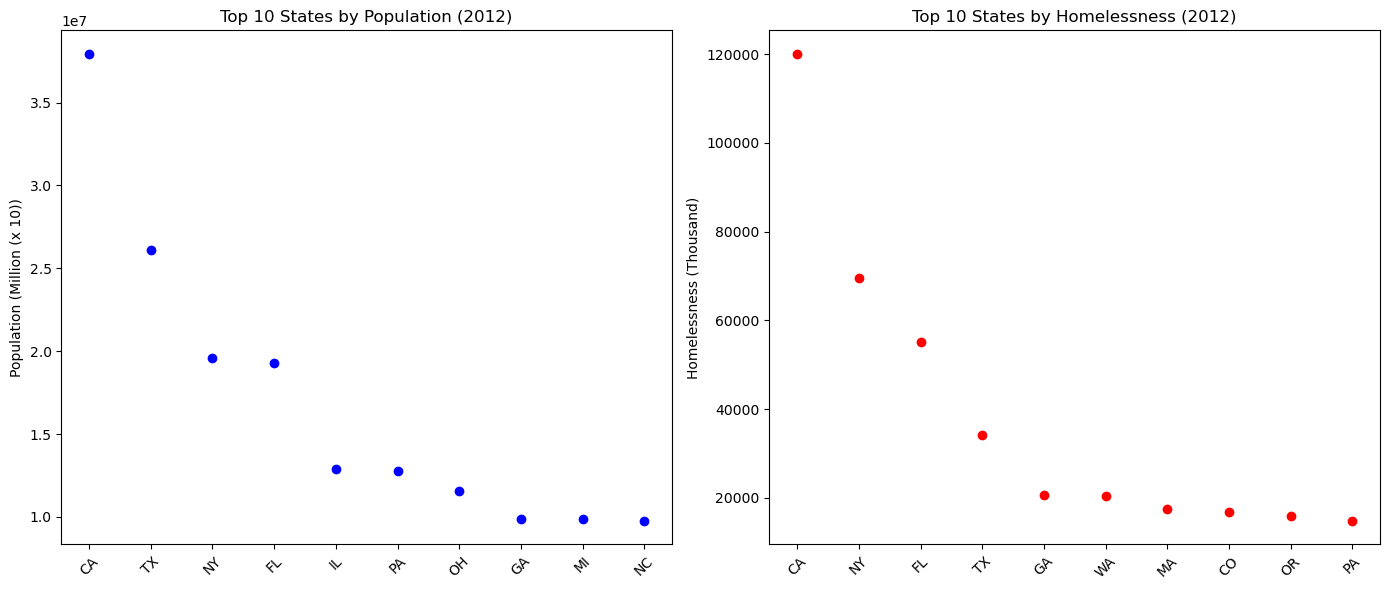

In [160]:
# Set up figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for population
ax1.scatter(top_10_population_df['State'], top_10_population_df[column_number], color='blue')
ax1.set_title(f'Top 10 States by Population ({value_for_year})')
ax1.set_ylabel('Population (Million (x 10))')
 

# Bar chart for homelessness
ax2.scatter(top_10_homelessness_df['State'], top_10_homelessness_df[column_number_2], color='red')
ax2.set_title(f'Top 10 States by Homelessness ({value_for_year})')
ax2.set_ylabel('Homelessness (Thousand)')
 

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [161]:
# Merge the two DataFrames on the 'State' column
merged_df_top_10 = pd.merge(top_10_population_df, top_10_homelessness_df, on='State', suffixes=('_population', '_homelessness'))

# Calculate the correlation
correlation = merged_df_top_10[column_number].corr(merged_df_top_10[column_number_2])

# Display the correlation
print(f'Correlation between Population and Homelessness in the year {value_for_year} is: {correlation}')

if correlation < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation > 0.3 and correlation <0.5 :
    print (f"we have Weak correlation")
elif correlation > 0.5 and correlation <0.7 :
    print (f"We have Moderate correlation")
elif correlation > 0.7 :
    print(f"We have Strong correlation")

Correlation between Population and Homelessness in the year 2012 is: 0.8554764530855836
We have Strong correlation


In [162]:
total_sum_population = population_df['Population ' + value_for_year].sum()

print(f"The total Population in USA in the year {value_for_year} was:", total_sum_population)

The total Population in USA in the year 2012 was: 307274979


In [163]:
total_sum_homeless = combined_df_clean[value_for_year + '_homelesess'].sum()

print(f"The total homeless in USA in the year {value_for_year} was:", total_sum_homeless)

The total homeless in USA in the year 2012 was: 604506.0


In [164]:
merge_total = pd.merge(combined_df_clean, population_df, on = 'State')
merge_total.head()

,State,2022_homelesess,2021_homelesess,2020_homelesess,2019_homelesess,2018_homelesess,2017_homelesess,2016_homelesess,2015_homelesess,2014_homelesess,...,Population 2013,Population 2014,Population 2015,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,Population 2021,Population 2022
0,AK,2320,1949,1949,1907,2016,1845,1940.0,1956.0,1784.0,...,737626,737075,738430,742575,740983,736624,733603,733374,734923,733276
1,AL,3752,2556,3351,3261,3434,3793,4111.0,3970.0,4561.0,...,4831586,4843737,4854803,4866824,4877989,4891628,4907965,5024294,5050380,5073903
2,AR,2459,2139,2366,2717,2712,2467,2463.0,2560.0,2936.0,...,2960459,2968759,2979732,2991815,3003855,3012161,3020985,3011490,3028443,3046404
3,AZ,13553,5460,10979,10007,9865,8947,9707.0,9896.0,10495.0,...,6634690,6732873,6832810,6944767,7048088,7164228,7291843,7157902,7272487,7365684
4,CA,171521,57468,161548,151278,129972,131532,118142.0,115738.0,113952.0,...,38253768,38586706,38904296,39149186,39337785,39437463,39437610,39538212,39145060,39040616


In [165]:
# Create a list containing the two column names
column_number = ['Population ' + value_for_year, value_for_year + '_homelesess']

# Merge the two DataFrames on the 'State' column
merge_total = pd.merge(combined_df_clean, population_df, on='State')

# Get the top 10 rows based on the specified columns
top_10_total = merge_total.nlargest(10, column_number)[['State'] + column_number]

# Display the top 10 DataFrame
top_10_total.head(10)

,State,Population 2012,2012_homelesess
4,CA,37944551,120098.0
42,TX,26084120,34052.0
33,NY,19574362,69566.0
9,FL,19302016,55170.0
14,IL,12883029,14144.0
37,PA,12769123,14736.0
34,OH,11550971,13977.0
10,GA,9903580,20516.0
22,MI,9898289,12592.0
26,NC,9751810,13524.0


In [167]:
# # Set up the figure and axes
# fig, (ax,ax2) = plt.subplots(1, 2, figsize=(10, 6))

# # Bar chart
# ax.bar(top_10_total['State'], top_10_total[value_for_year + '_homelesess'], color='blue')
# ax.set_title(f'Top 10 States with homelessness by population ({value_for_year})       vs')
# ax.set_ylabel('Homelessness (Thousand)')

# ax2.bar(top_10_homelessness_df['State'], top_10_homelessness_df[column_number_2], color='red')
# ax2.set_title(f'Top 10 States by Homelessness ({value_for_year})')
# ax2.set_ylabel('Homelessness (Thousand)')

# # Rotate x-axis labels for better readability
# ax.tick_params(axis='x', rotation=45)
# ax2.tick_params(axis='x', rotation=45)

# # # Adjust layout for better spacing
# plt.tight_layout()

# # Show the plot
# plt.show()

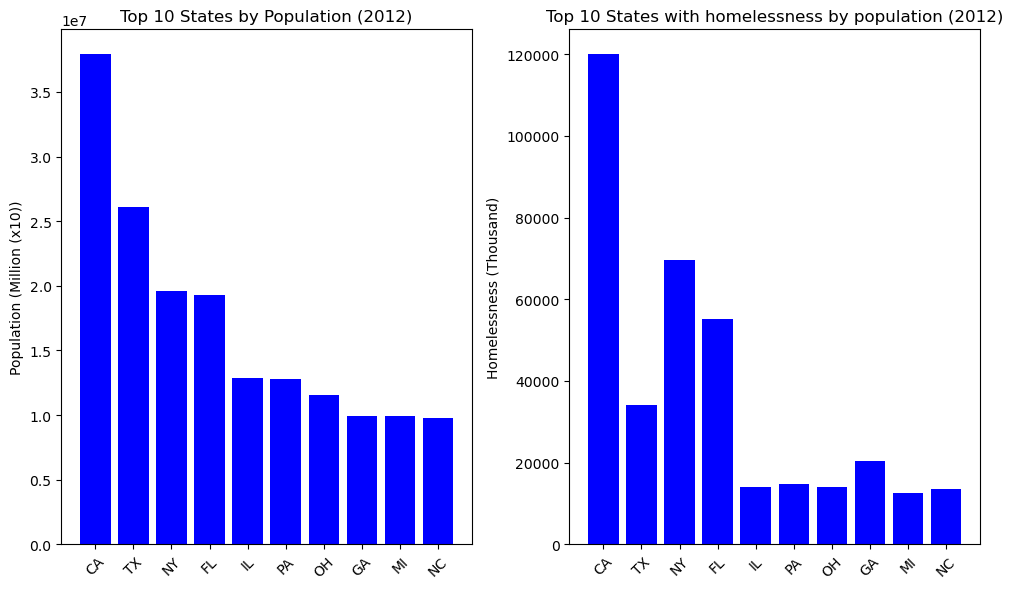

In [169]:
fig, (ax1, ax) = plt.subplots(1, 2, figsize=(10, 6))


# Bar chart for population
ax1.bar(top_10_total['State'], top_10_total['Population ' + value_for_year], color='blue')
ax1.set_title(f'Top 10 States by Population ({value_for_year})')
ax1.set_ylabel('Population (Million (x10))')

# Bar chart
ax.bar(top_10_total['State'], top_10_total[value_for_year + '_homelesess'], color='blue')
ax.set_title(f'Top 10 States with homelessness by population ({value_for_year})')
ax.set_ylabel('Homelessness (Thousand)')


# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)
ax.tick_params(axis='x', rotation=45)

# # Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [170]:
# Calculate the correlation
correlation = top_10_total[value_for_year + '_homelesess'].corr(top_10_total['Population ' + value_for_year])

# Display the correlation
print(f'Correlation between population and homelessness using the same states as "top 10 states by population" in the year {value_for_year} is: {round(correlation,2)}')

if correlation < 0.3 :
    print(f"we have None or very weak correlation")
elif correlation > 0.3 and correlation <0.5 :
    print (f"we have Weak correlation")
elif correlation > 0.5 and correlation <0.7 :
    print (f"We have Moderate correlation")
elif correlation > 0.7 :
    print(f"We have Strong correlation")

Correlation between population and homelessness using the same states as "top 10 states by population" in the year 2012 is: 0.9
We have Strong correlation


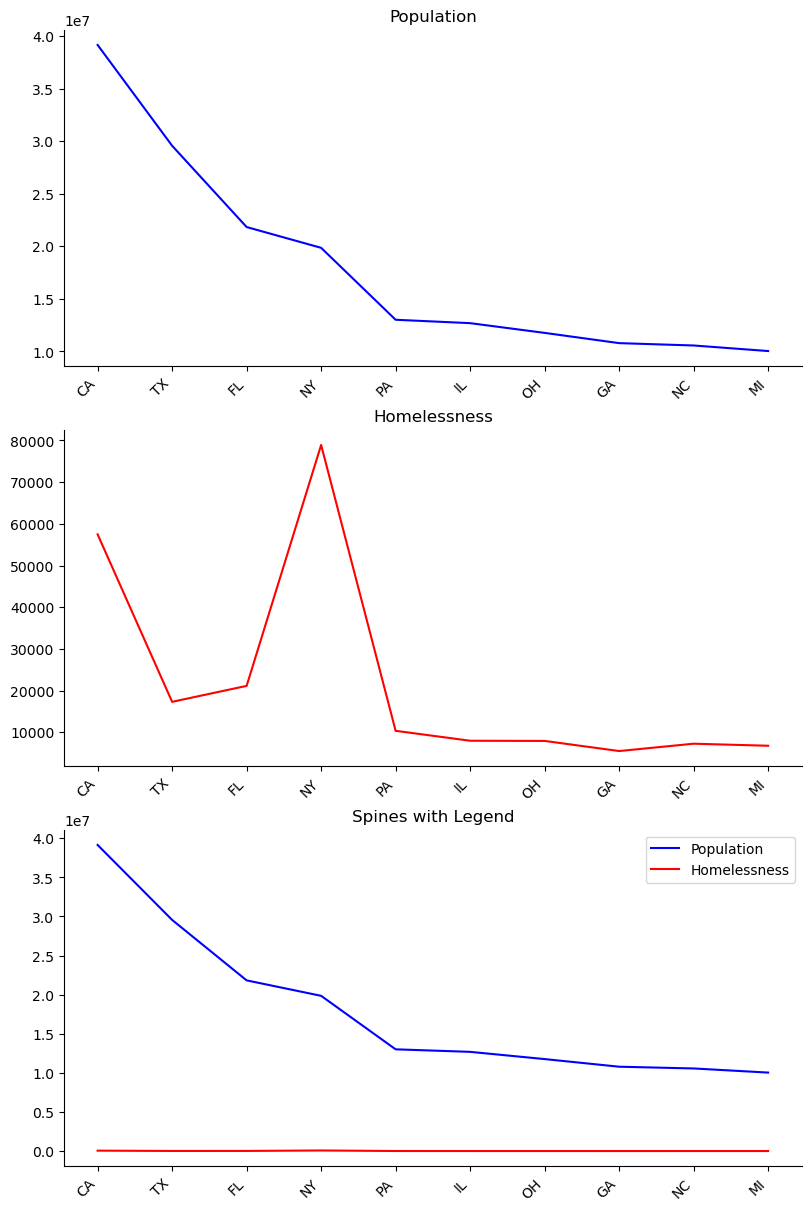

In [134]:
# Set up the figure and axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, constrained_layout=True, figsize=(8, 12))

# Data
x = np.arange(len(top_10_total['State']))
population = top_10_total['Population ' + value_for_year]
homelessness = top_10_total[value_for_year + '_homelesess']

# Plotting on each subplot
ax0.plot(x, population, color='blue')
ax0.set_title('Population')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_xticks(x)
ax0.set_xticklabels(top_10_total['State'], rotation=45, ha='right')

ax1.plot(x, homelessness, color='red')
ax1.set_title('Homelessness')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xticks(x)
ax1.set_xticklabels(top_10_total['State'], rotation=45, ha='right')

ax2.plot(x, population, color='blue', label='Population')
ax2.plot(x, homelessness, color='red', label='Homelessness')
ax2.legend()
ax2.set_title('Spines with Legend')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xticks(x)
ax2.set_xticklabels(top_10_total['State'], rotation=45, ha='right')

plt.show()

In [135]:
homelessness_2022 = "2022_homelesess"
top_5 = combined_df_clean.nlargest(5, homelessness_2022)[['State', homelessness_2022]]

top_5_homelessness_2022_df = pd.DataFrame({'State': top_5['State'].tolist(), homelessness_2022: top_5[homelessness_2022].tolist()})

top_5_homelessness_2022_df.head()

,State,2022_homelesess
0,CA,171521
1,NY,74178
2,FL,25959
3,WA,25211
4,TX,24432


In [171]:
import requests
import json

from config_key import geoapify_key

# List of states
states = ['California', 'New York', 'Florida', 'Washington D. C.', 'Texas']

# Initialize an empty list to store the results
results = []

# Iterate over each state
for state in states:
    
    # Build the endpoint URL
    target_country = f"{state}, USA"
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_country}&format=json&apiKey={geoapify_key}"

    # Make the API request
    response = requests.get(target_url)
    data = response.json()

    # Check if the request was successful
    if response.status_code == 200:
        
        # Append the result to the list
        results.append(data)
    else:
        print(f"Error for {state}: {data}")

# Display the results
print(json.dumps(results, indent=2))
 

[
  {
    "results": [
      {
        "datasource": {
          "sourcename": "openstreetmap",
          "attribution": "\u00a9 OpenStreetMap contributors",
          "license": "Open Database License",
          "url": "https://www.openstreetmap.org/copyright"
        },
        "ref": "CA",
        "country": "United States",
        "country_code": "us",
        "state": "California",
        "lon": -118.755997,
        "lat": 36.7014631,
        "state_code": "CA",
        "formatted": "California, United States of America",
        "address_line1": "California",
        "address_line2": "United States of America",
        "category": "administrative",
        "timezone": {
          "name": "America/Los_Angeles",
          "offset_STD": "-08:00",
          "offset_STD_seconds": -28800,
          "offset_DST": "-07:00",
          "offset_DST_seconds": -25200,
          "abbreviation_STD": "PST",
          "abbreviation_DST": "PDT"
        },
        "plus_code": "8583P62V+HJ",
   

In [172]:
from pprint import pprint

for i in range (0,5):

    pprint(results[i]['results'][0]['state'])
    pprint(results[i]['results'][0]['lat'])
    pprint(results[i]['results'][0]['lon'])



'California'
36.7014631
-118.755997
'New York'
40.7127281
-74.0060152
'Florida'
28.5421109
-81.3790304
'District of Columbia'
38.8950368
-77.0365427
'Texas'
31.2638905
-98.5456116


In [173]:
state_list = [results[i]['results'][0]['state'] for i in range(5)]
latitude_list = [results[i]['results'][0]['lat'] for i in range(5)]
longitude_list = [results[i]['results'][0]['lon'] for i in range(5)]

# Create a DataFrame
df = pd.DataFrame({'State': state_list, homelessness_2022: top_5[homelessness_2022].tolist(), 'Latitude': latitude_list, 'Longitude': longitude_list})

# Display the DataFrame
df.head()

,State,2022_homelesess,Latitude,Longitude
0,California,171521,36.701463,-118.755997
1,New York,74178,40.712728,-74.006015
2,Florida,25959,28.542111,-81.379030
3,District of Columbia,25211,38.895037,-77.036543
4,Texas,24432,31.263890,-98.545612


In [174]:
import hvplot.pandas
import pandas as pd

map_plot_4 = df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.01,
    color = "State"
)

# Display the map plot
map_plot_4

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (State)